In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# plot MFs for clustering and lensing maps
from matplotlib import rcParams
rcParams['xtick.direction'] = 'in'
rcParams['xtick.major.size'] = 10
rcParams['xtick.minor.size'] = 5
rcParams['xtick.minor.visible'] = True
rcParams['ytick.direction'] = 'in'
rcParams['ytick.minor.size'] = 5
rcParams['ytick.minor.visible'] = True
rcParams['ytick.major.size'] = 10
rcParams['font.family'] = 'serif'
#rcParams['font.serif'] = ['Times New Roman']
rcParams['font.size'] = 12

In [118]:
import numpy as np
import matplotlib.pyplot as plt
import math
import os

output_path = os.path.join(os.getcwd(), '2_Maps_Output')
parent_path = os.path.join(output_path, 'Simplified')
cov_path = os.path.join(output_path, 'cov_fix')

onemap_path = os.path.join(os.getcwd(), '1_Map_Output')

### 1. Threshold

In [121]:
# one map
nside = 256
N = 12*nside*nside
smoothing = 20
thr_ct=10
t = [10,12,14,16,18,20]

def load_t(path,t):
    cp1 = np.zeros(len(t))
    for i,thr_ct in enumerate(t):
        sub_path = os.path.join(path, f't{thr_ct}_n{nside}_s{smoothing}')
        output = np.loadtxt(os.path.join(sub_path, 'c.out'))
        cp1[i] = output[3]
    return cp1

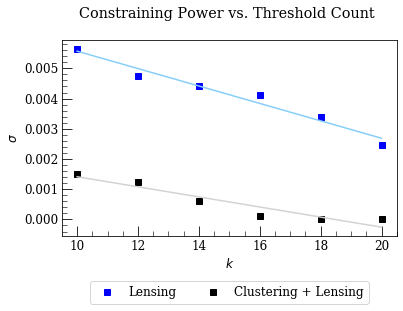

In [182]:
x = np.array(t)
y1 = load_t(onemap_path,t)
y2 = load_t(cov_path,t)

m1, b1 = np.polyfit(x, y1, 1)
m2, b2 = np.polyfit(x, y2, 1)

fig = plt.figure()
ax = plt.subplot(111)

ax.plot(x,y1,'s',color='blue',label='Lensing')
ax.plot(x, m1*x + b1, color='lightskyblue')
ax.plot(x,y2,'s',color='black',label='Clustering + Lensing')
ax.plot(x, m2*x + b2,color='lightgrey')
ax.set_xlabel('$k$')
ax.set_ylabel('$\sigma$')
ax.set_title('Constraining Power vs. Threshold Count \n')
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,box.width, box.height * 0.9])
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=False, ncol=5)
plt.show()

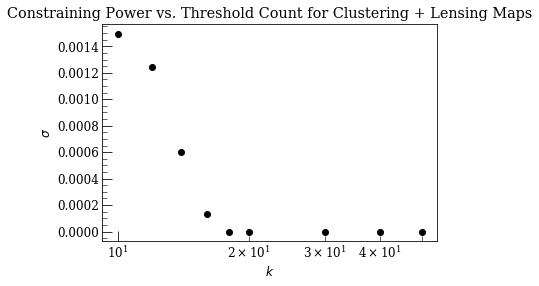

In [123]:
# two maps
t1 = [10,12,14,16,18,20,30,40,50]
    
# explore fits - check numbers, different curves    
plt.semilogx(t1,load_t(cov_path,t1),'o',color='black')
#plt.plot(t_array,cp1,'o',color='black')
plt.xlabel('$k$')
plt.ylabel('$\sigma$')
plt.title('Constraining Power vs. Threshold Count for Clustering + Lensing Maps');

### 2. Smoothing

In [153]:
thr_ct = 10
nside = 256
smoothing_array = np.linspace(10,60,11,dtype=int)
array_len = thr_ct * map_len * 3

def load_smoothing(path):
    cp2 = np.zeros(len(smoothing_array))
    for i,smoothing in enumerate(smoothing_array):
        sub_path = os.path.join(path, f't{thr_ct}_n{nside}_s{smoothing}')
        output = np.loadtxt(os.path.join(sub_path, 'c.out'))
        cp2[i] = output[3]
    return cp2


def load_s(path):
    cp1 = np.zeros(len(smoothing_array))
    e = np.zeros(len(smoothing_array))
    
    for i,smoothing in enumerate(smoothing_array):
        sub_path = os.path.join(path, f't{thr_ct}_n{nside}_s{smoothing}')
        v_all_fixed = np.loadtxt(os.path.join(sub_path, 'v_all_fixed.out'))
        v_all_changing = np.loadtxt(os.path.join(sub_path, 'v_all_changing'))
        output = np.loadtxt(os.path.join(sub_path, 'c.out'))
        
        cp1[i] = output[3]
        e[i] = likelihood_error(v_all_fixed,v_all_changing,array_len)  
        
    return cp1,e

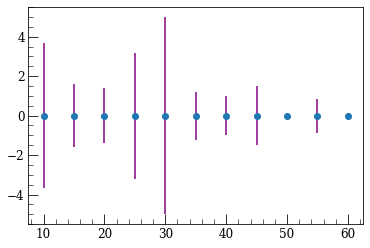

In [154]:
## plotting the 2 maps error
# error is probably so large due to low number of points used to build parabola (b=10)
plt.errorbar(smoothing_array,load_s(cov_path)[0],yerr=load_s(cov_path)[1],linestyle="None",fmt='o',ecolor='purple');

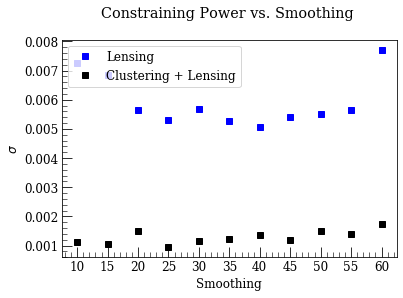

In [152]:
# 1 map vs 2 maps
    
plt.plot(smoothing_array,load_smoothing(onemap_path),'s',color='blue',label='Lensing')
plt.plot(smoothing_array,load_smoothing(cov_path),'s',color='black',label='Clustering + Lensing')
plt.xlabel('Smoothing')
plt.xticks(smoothing_array)
plt.ylabel('$\sigma$')
plt.title('Constraining Power vs. Smoothing \n')
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1);

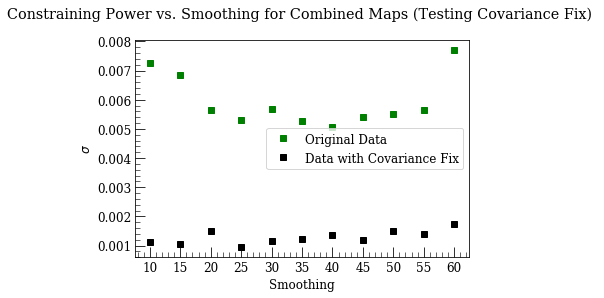

In [120]:
# visualise covariance fix

plt.plot(smoothing_array,load_smoothing(onemap_path),'s',color='green',label='Original Data')
plt.plot(smoothing_array,load_smoothing(cov_path),'s',color='black',label='Data with Covariance Fix')
plt.xlabel('Smoothing')
plt.xticks(smoothing_array)
plt.ylabel('$\sigma$')
plt.title('Constraining Power vs. Smoothing for Combined Maps (Testing Covariance Fix) \n')
plt.legend();

### 3. nside

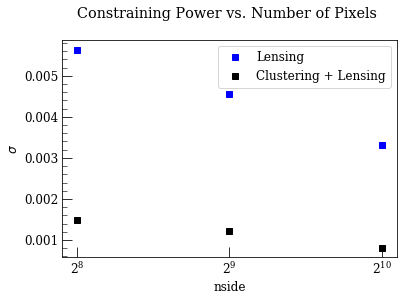

In [139]:
# 1 map
nside_array = [256,512,1024]
thr_ct = 10
smoothing = 20

def load_nside(path):
    cp3 = np.zeros(len(nside_array))
    for i,nside in enumerate(nside_array):
        sub_path = os.path.join(path, f't{thr_ct}_n{nside}_s{smoothing}')
        output = np.loadtxt(os.path.join(sub_path, 'c.out'))
        cp3[i] = output[3]
    return cp3
    
plt.plot(nside_array,load_nside(onemap_path),'s',color='blue',label='Lensing')
plt.plot(nside_array,load_nside(cov_path),'s',color='black',label='Clustering + Lensing')
plt.xlabel('nside')
plt.xscale('log',basex=2)
plt.ylabel('$\sigma$')
plt.title('Constraining Power vs. Number of Pixels \n')
plt.legend();

### 4. Sky Fraction

In [142]:
nside=512
thr_ct = 10
smoothing = 20
N_p = 12*nside*nside

def load_sky_frac(f_array,path):
    f_array_plot = np.array(f_array)/N_p
    cp = np.zeros(len(f_array))
    for i,f in enumerate(f_array):
        sub_path = os.path.join(path, f't{thr_ct}_n{nside}_s{smoothing}_f{f}')
        output = np.loadtxt(os.path.join(sub_path, 'c.out'))
        cp[i] = output[3]
    return f_array_plot,cp

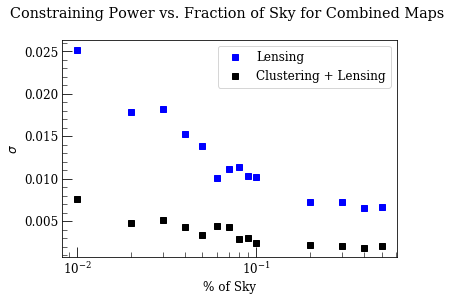

In [189]:
# 1 map
f_array1 = [int(floor(0.01*N_p)),int(floor(0.02*N_p)),int(floor(0.03*N_p)),int(floor(0.04*N_p)),int(floor(0.05*N_p)),
            int(floor(0.06*N_p)),int(floor(0.07*N_p)),int(floor(0.08*N_p)),int(floor(0.09*N_p)),
            int(floor(0.1*N_p)),int(floor(0.2*N_p)),int(floor(0.3*N_p)),int(floor(0.4*N_p)),int(floor(0.5*N_p))]

# 2 maps
f_array2 = [int(floor(0.01*N_p)),int(floor(0.02*N_p)),int(floor(0.03*N_p)),int(floor(0.04*N_p)),int(floor(0.05*N_p)),
          int(floor(0.06*N_p)),int(floor(0.07*N_p)),int(floor(0.08*N_p)),int(floor(0.09*N_p)),int(floor(0.1*N_p)),
           int(floor(0.2*N_p)),int(floor(0.3*N_p)),int(floor(0.4*N_p)),int(floor(0.5*N_p))]

plt.plot(load_sky_frac(f_array1,onemap_path)[0],load_sky_frac(f_array1,onemap_path)[1],'s',color='blue',label='Lensing')
plt.plot(load_sky_frac(f_array2,cov_path)[0],load_sky_frac(f_array2,cov_path)[1],'s',color='black',label='Clustering + Lensing')
plt.xlabel('% of Sky')
plt.xscale('log')
plt.ylabel('$\sigma$')
plt.title('Constraining Power vs. Fraction of Sky for Combined Maps \n')
plt.legend();

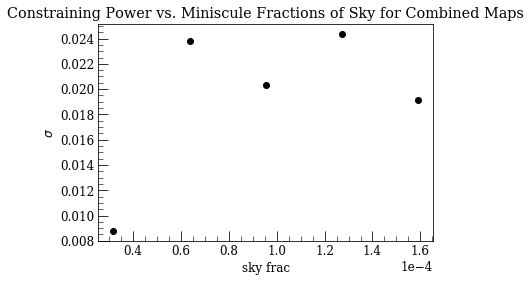

In [126]:
# 2 maps - miniscule scale

smoothing = 5
f_array = [100,200,300,400,500]
    
plt.plot(load_sky_frac(f_array,cov_path)[0],load_sky_frac(f_array,cov_path)[1],'s',color='black')
plt.xlabel('sky frac')
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.ylabel('$\sigma$')
plt.title('Constraining Power vs. Miniscule Fractions of Sky for Combined Maps');

### Sky Fraction of Real Surveys

In [183]:
nside=512
thr_ct = 10
smoothing = 20
N_p = 12*nside*nside
f_kids = [int(floor(0.02*N_p))]
f_des = [int(floor(0.03*N_p))]
f_lsst = [int(floor(0.44*N_p))]

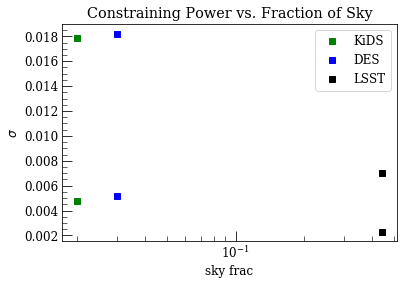

In [187]:
# 1 & 2 maps

plt.plot(load_sky_frac(f_kids,onemap_path)[0],load_sky_frac(f_kids,onemap_path)[1],'s',color='green',label='KiDS')
plt.plot(load_sky_frac(f_des,onemap_path)[0],load_sky_frac(f_des,onemap_path)[1],'s',color='blue',label='DES')
plt.plot(load_sky_frac(f_lsst,onemap_path)[0],load_sky_frac(f_lsst,onemap_path)[1],'s',color='black',label='LSST')

plt.plot(load_sky_frac(f_kids,cov_path)[0],load_sky_frac(f_kids,cov_path)[1],'s',color='green')
plt.plot(load_sky_frac(f_des,cov_path)[0],load_sky_frac(f_des,cov_path)[1],'s',color='blue')
plt.plot(load_sky_frac(f_lsst,cov_path)[0],load_sky_frac(f_lsst,cov_path)[1],'s',color='black')

plt.xlabel('sky frac')
plt.xscale('log')
#plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.ylabel('$\sigma$')
plt.title('Constraining Power vs. Fraction of Sky')
plt.legend();

In [149]:
def likelihood_error(v_all_fixed,v_all_changing,array_len,itr=100,b=10):
        
    # fixed map mean    
    v_all_mean = np.zeros(array_len)
    for i in range(array_len):
        v_all_mean[i] = np.mean(v_all_fixed[:,i]) 

    # covariance
    cov = np.cov((v_all_fixed.transpose()))
    
    # singular covariance matrix workaround
    good = cov.diagonal() > 0
    cov2 = cov[good][:, good]

    # calculate the likelihood          
    L = np.zeros(b)
    N_ = itr-1           # number of realisations - 1
    p = array_len        # number of data points

    try:
        inv_cov = ((N_)/(N_ - p - 1)) * np.linalg.inv(cov)
        for i in range(b):
            L[i] = -0.5 * (v_all_changing[i] - v_all_mean) @ inv_cov @ (v_all_changing[i] - v_all_mean)
    except:
        inv_cov2 = ((N_)/(N_ - p - 1)) * np.linalg.inv(cov2)
        for i in range(b):
            d = (v_all_changing[i] - v_all_mean)[good]
            L[i] = -0.5 * d @ inv_cov2 @ d
            
    # calculate S_8  
    omega_m = np.linspace(0.2,0.4,b)
    sigma_8 = 0.8989639361571576*omega_m + 0.5303108191528527
    S_8 = sigma_8 * (omega_m/0.3)**0.5329788249790618 
    
    coefficient = np.polyfit(S_8,L,2)
    poly = np.poly1d(coefficient)     
    test_y = poly(S_8)
    diff = (L-test_y)/test_y
    
    return np.std(diff,axis=0)

In [159]:
import pandas as pd

ModuleNotFoundError: No module named 'pandas'